In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing dataset
dataset = pd.read_csv('adult.csv')

In [2]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [4]:
# Features data-type 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [7]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [8]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

In [9]:
#1. The dataset doesn’t have any null values, but it contains missing values in the form of ‘?’ 
#   which needs to be preprocessed.
#2. The dataset is unbalanced, as the dependent feature ‘income’ contains 75.92% values have income
#   less than 50k, and 24.08% values have income more than 50k.

In [10]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [11]:
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.columns:
  if dataset[col].dtypes == 'object':         
    encoder = LabelEncoder()         
    dataset[col] = encoder.fit_transform(dataset[col])

In [13]:
X = dataset.drop('income', axis = 1) 
Y = dataset['income']

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state = 42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.38
1 4.48
2 16.51
3 3.56
4 9.04
5 7.38
6 7.53
7 9.25
8 1.47
9 2.76
10 8.76
11 2.77
12 9.36
13 1.75


In [15]:
X = X.drop(['workclass', 'education', 'race', 'sex', 'capital.loss', 'native.country'], axis = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:     
  scaler = StandardScaler()     
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [17]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [18]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state = 42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("Y_train shape:", Y_train.shape) 
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state = 42)
ran_for.fit(X_train, Y_train)
Y_pred_ran_for = ran_for.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:',round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.4
F1 score: 92.77


In [22]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(X_train, Y_train)
rf_cv.best_score_

0.9133799294649819

In [23]:
rf_cv.best_params_

{'n_estimators': 126, 'max_depth': 79}

In [24]:
rf_best = RandomForestClassifier(max_depth = 102, n_estimators = 40, random_state = 42)
rf_best.fit(X_train, Y_train)
Y_pred_rf_best = rf_best.predict(X_test)
print('Random Forest Classifier:') 
print('Accuracy score:',round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2)) 
print('F1 score:',round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.53
F1 score: 92.87


In [25]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred_rf_best)
cm

array([[4333,  622],
       [ 117, 4816]], dtype=int64)

<AxesSubplot:>

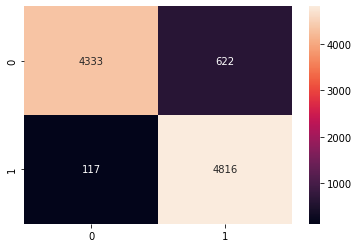

In [26]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')

In [27]:
X_test

,age,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week
32168,1.130359,-0.629137,-2.363558,-0.406212,-0.844861,-0.900181,-0.14592,-0.035429
199,3.769612,-1.307783,-0.420060,0.921634,0.337510,-0.277805,-0.14592,-0.035429
16026,-1.435581,0.963830,-0.808759,0.921634,-1.554283,0.966947,-0.14592,-1.007307
10791,1.130359,-0.189424,-0.031360,-1.734058,-0.608387,-0.277805,-0.14592,-0.035429
33656,-0.335892,0.297386,0.746039,-0.406212,-1.317809,2.211698,-0.14592,-0.035429
...,...,...,...,...,...,...,...,...
30612,-1.215643,1.175714,-1.197459,0.921634,-0.844861,0.966947,-0.14592,-0.845327
33730,0.690484,0.014199,0.357340,-0.406212,-0.608387,-0.900181,-0.14592,0.774468
4546,-1.215643,1.637265,0.746039,0.921634,1.283407,-0.277805,-0.14592,-2.060174
26559,1.057047,0.559513,1.134739,-0.406212,0.810458,2.211698,-0.14592,0.774468
